In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

##The Fashion MNIST dataset includes:

60,000 training examples,
10,000 testing examples,
10 classes,
28×28 grayscale/single channel images

###The ten fashion class labels include:

- T-shirt/top
- Trouser/pants
- Pullover shirt
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

In [2]:
#load data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

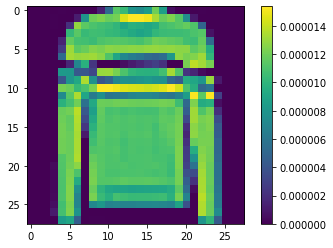

In [39]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
#plt.show()

###### scale your data

train_images = train_images / 255.0

test_images = test_images / 255.0

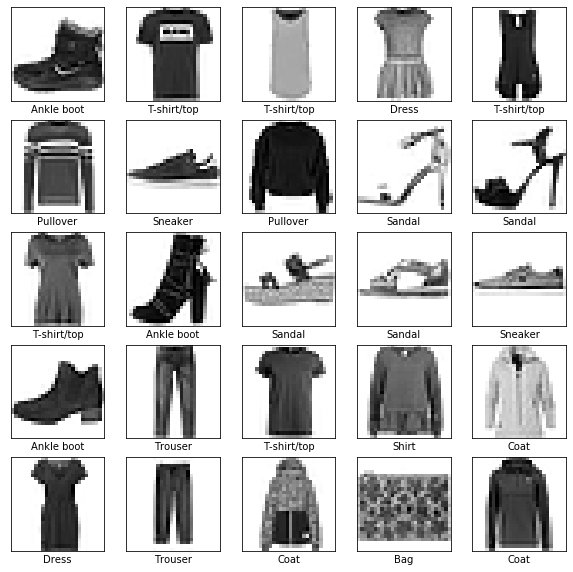

In [28]:
#see your first 25 object
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    #plt.show()

In [6]:
#create your network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
#compile
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fit(epoch,step_per_epoch,batch_size)
model.fit(train_images, train_labels, epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 204us/sample - loss: 0.5032 - accuracy: 0.8209
Epoch 2/25
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3771 - accuracy: 0.8637
Epoch 3/25
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3409 - accuracy: 0.8749
Epoch 4/25
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3161 - accuracy: 0.8836
Epoch 5/25
60000/60000 [==============================] - 10s 166us/sample - loss: 0.2973 - accuracy: 0.8907
Epoch 6/25
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2818 - accuracy: 0.8964
Epoch 7/25
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2717 - accuracy: 0.8988
Epoch 8/25
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2601 - accuracy: 0.9022
Epoch 9/25
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2522 - accuracy: 0.9047


In [8]:
#model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.886


In [40]:
#predict
predictions = model.predict(test_images)

predictions[5000]

array([2.7407339e-02, 6.2696563e-06, 9.2313116e-05, 1.5849018e-04,
       1.6859602e-05, 9.6687621e-01, 4.6848645e-03, 4.6913902e-04,
       2.8838508e-04, 1.6747667e-07], dtype=float32)

In [41]:
#plot images

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

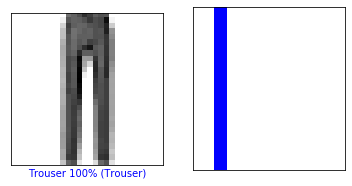

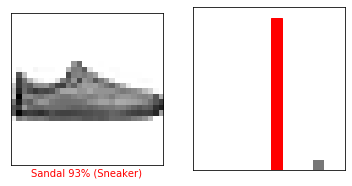

In [11]:


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


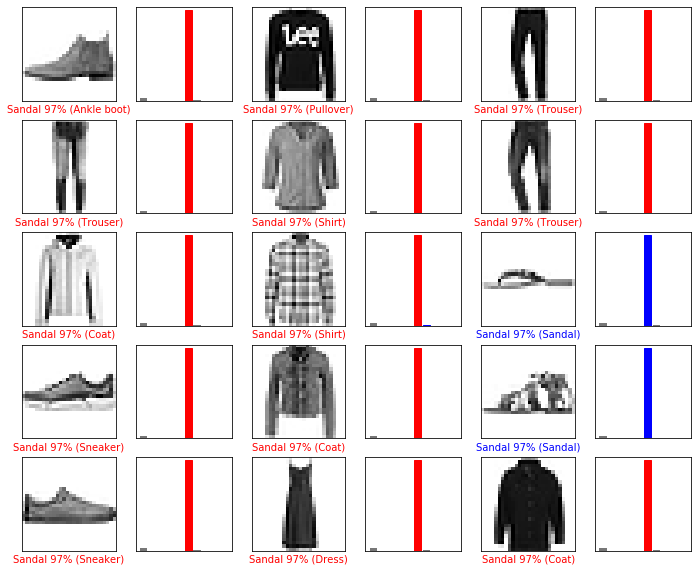

In [44]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
#plt.show()

In [47]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)


(28, 28)


In [48]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)


(1, 28, 28)
[[2.7333027e-02 6.2498284e-06 9.1845475e-05 1.5787147e-04 1.6782225e-05
  9.6696711e-01 4.6698861e-03 4.6921356e-04 2.8784340e-04 1.6717325e-07]]


5

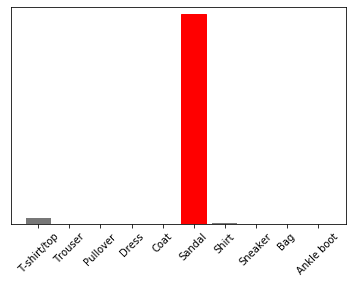

In [49]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])